# Studying GSE Scaling using pyLIQTR

DISTRIBUTION STATEMENT A. Approved for public release. Distribution is unlimited.

<br>
This material is based upon work supported by the Under Secretary of Defense for
Research and Engineering under Air Force Contract No. FA8702-15-D-0001. Any opinions,
findings, conclusions or recommendations expressed in this material are those of the
author(s) and do not necessarily reflect the views of the Under Secretary of Defense
for Research and Engineering.

<br>
© 2022 Massachusetts Institute of Technology.

<br>
<br>
The software/firmware is provided to you on an As-Is basis

<br>
<br>
Delivered to the U.S. Government with Unlimited Rights, as defined in DFARS Part
252.227-7013 or 7014 (Feb 2014). Notwithstanding any copyright notice, U.S. Government
rights in this work are defined by DFARS 252.227-7013 or DFARS 252.227-7014 as detailed
above. Use of this work other than as specifically authorized by the U.S. Government
may violate any copyrights that exist in this work.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Using $H_2$ as a test molecule:
Due to the runtime required to generate the scaling data, an accompanying python script is used to generate the data and store it in a .csv file.

In [ ]:
###
### Optional: Uncomment and run the .py file.
### Note: Script took ~1 hr to run on local machine
###

# !python scaling_scripts/H2_Scaling.py

In [7]:
###
### Load the data:
###
df_h2 = pd.read_csv('scaling_scripts/gse_H2_scaling.csv')
df_h2.head()

,Num_Qubits,Prec_Bits,Trot_Order,Trot_Steps,Circ_Gen_Time,CliffT_Decomp_Time,CliffT_Depth,CliffT_T_Gate_Count
0,5,3,1,1,0.259288,16.231099,48263,19995
1,5,3,1,2,0.188175,15.542987,96055,39591
2,5,3,1,4,0.322504,27.274603,190659,78495
3,5,3,1,8,0.659374,55.513294,385628,158511
4,5,3,2,1,0.189639,14.259120,90442,38135


(5000, 1000000)

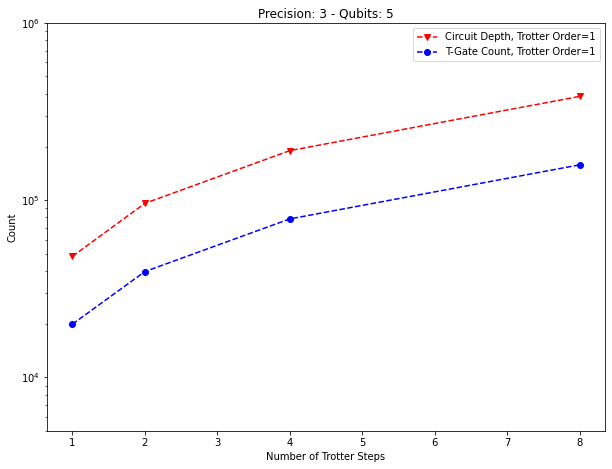

In [8]:
### 
### Plot circuit depth and T-Gate count as a function of 
### trotter steps for fixed trotter order and number of 
### measured precision bits.
### 
plt.figure(figsize=(10,7.5))
plt.plot(
    df_h2['Trot_Steps'].loc[(df_h2['Prec_Bits']==3) & (df_h2['Trot_Order']==1)],
    df_h2['CliffT_Depth'].loc[(df_h2['Prec_Bits']==3) & (df_h2['Trot_Order']==1)],
    'r--v', label='Circuit Depth, Trotter Order=1')
plt.plot(
    df_h2['Trot_Steps'].loc[(df_h2['Prec_Bits']==3) & (df_h2['Trot_Order']==1)],
    df_h2['CliffT_T_Gate_Count'].loc[(df_h2['Prec_Bits']==3) & (df_h2['Trot_Order']==1)],
    'b--o', label='T-Gate Count, Trotter Order=1')
plt.legend()
plt.title('Precision: 3 - Qubits: 5')
plt.xlabel('Number of Trotter Steps')
plt.ylabel('Count')
plt.yscale('log')
plt.ylim([5*10**3, 10**6])

(5000, 1000000)

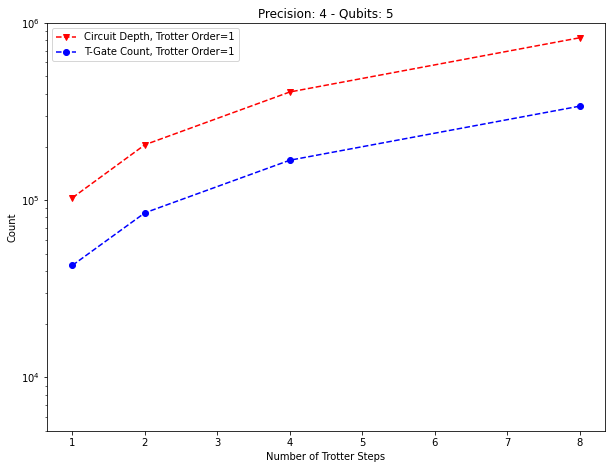

In [9]:
### 
### Plot circuit depth and T-Gate count as a function of 
### trotter steps for fixed trotter order and number of 
### measured precision bits.
### 
plt.figure(figsize=(10,7.5))
plt.plot(
    df_h2['Trot_Steps'].loc[(df_h2['Prec_Bits']==4) & (df_h2['Trot_Order']==1)],
    df_h2['CliffT_Depth'].loc[(df_h2['Prec_Bits']==4) & (df_h2['Trot_Order']==1)],
    'r--v', label='Circuit Depth, Trotter Order=1')
plt.plot(
    df_h2['Trot_Steps'].loc[(df_h2['Prec_Bits']==4) & (df_h2['Trot_Order']==1)],
    df_h2['CliffT_T_Gate_Count'].loc[(df_h2['Prec_Bits']==4) & (df_h2['Trot_Order']==1)],
    'b--o', label='T-Gate Count, Trotter Order=1')
plt.legend()
plt.title('Precision: 4 - Qubits: 5')
plt.xlabel('Number of Trotter Steps')
plt.ylabel('Count')
plt.yscale('log')
plt.ylim([5*10**3, 10**6])

(50000, 10000000)

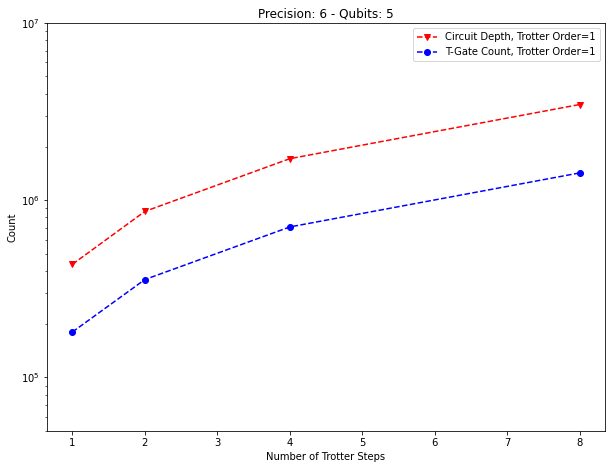

In [10]:
### 
### Plot circuit depth and T-Gate count as a function of 
### trotter steps for fixed trotter order and number of 
### measured precision bits.
### 
plt.figure(figsize=(10,7.5))
plt.plot(
    df_h2['Trot_Steps'].loc[(df_h2['Prec_Bits']==6) & (df_h2['Trot_Order']==1)],
    df_h2['CliffT_Depth'].loc[(df_h2['Prec_Bits']==6) & (df_h2['Trot_Order']==1)],
    'r--v', label='Circuit Depth, Trotter Order=1')
plt.plot(
    df_h2['Trot_Steps'].loc[(df_h2['Prec_Bits']==6) & (df_h2['Trot_Order']==1)],
    df_h2['CliffT_T_Gate_Count'].loc[(df_h2['Prec_Bits']==6) & (df_h2['Trot_Order']==1)],
    'b--o', label='T-Gate Count, Trotter Order=1')
plt.legend()
plt.title('Precision: 6 - Qubits: 5')
plt.xlabel('Number of Trotter Steps')
plt.ylabel('Count')
plt.yscale('log')
plt.ylim([5*10**4, 10**7])

(5000, 5000000)

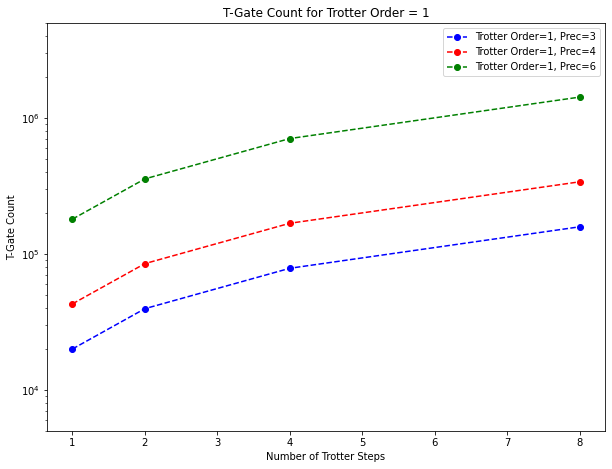

In [12]:
###
### Compare T-Gate counts for trotter order=1 circuits of varying precision
### 

plt.figure(figsize=(10,7.5))
plt.plot(
    df_h2['Trot_Steps'].loc[(df_h2['Prec_Bits']==3) & (df_h2['Trot_Order']==1)],
    df_h2['CliffT_T_Gate_Count'].loc[(df_h2['Prec_Bits']==3) & (df_h2['Trot_Order']==1)],
    'b--o', label='Trotter Order=1, Prec=3')
plt.plot(
    df_h2['Trot_Steps'].loc[(df_h2['Prec_Bits']==4) & (df_h2['Trot_Order']==1)],
    df_h2['CliffT_T_Gate_Count'].loc[(df_h2['Prec_Bits']==4) & (df_h2['Trot_Order']==1)],
    'r--o', label='Trotter Order=1, Prec=4')
plt.plot(
    df_h2['Trot_Steps'].loc[(df_h2['Prec_Bits']==6) & (df_h2['Trot_Order']==1)],
    df_h2['CliffT_T_Gate_Count'].loc[(df_h2['Prec_Bits']==6) & (df_h2['Trot_Order']==1)],
    'g--o', label='Trotter Order=1, Prec=6')


plt.legend()
plt.title('T-Gate Count for Trotter Order = 1')
plt.xlabel('Number of Trotter Steps')
plt.ylabel('T-Gate Count')
plt.yscale('log')
plt.ylim([5*10**3, 5*10**6])

## Using $LiH$ as a test molecule:

In [6]:
###
### Optional: Uncomment and run the .py file.
### Note: Script took ~1.5 hr to run on local machine, and it did not finish
### We are still investigating if we can build larger LiH circuits without
### encountering issues.
### 

# !python scaling_scripts/LiH_Scaling.py

In [13]:
###
### Load the data:
###
df_lih = pd.read_csv('scaling_scripts/gse_LiH_scaling.csv')
df_lih.head()

,Num_Qubits,Prec_Bits,Trot_Order,Trot_Steps,Circ_Gen_Time,CliffT_Decomp_Time,CliffT_Depth,CliffT_T_Gate_Count
0,13,3,1,1,10.839094,317.088334,2598317,886031
1,13,3,1,2,18.757718,637.962113,5192508,1775707
2,13,3,1,4,37.281118,1255.405307,10405885,3556989
3,13,3,1,8,73.900790,2499.977821,20247429,6892311
4,13,3,2,1,18.137871,557.922882,5195227,1774249


(100000, 100000000)

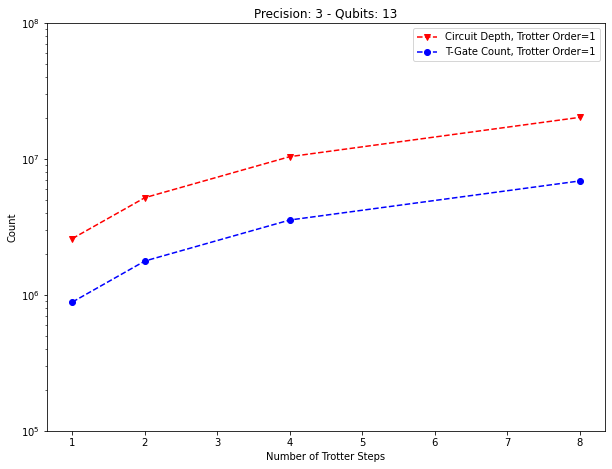

In [14]:
### 
### Plot circuit depth and T-Gate count as a function of 
### trotter steps for fixed trotter order and number of 
### measured precision bits.
### 
plt.figure(figsize=(10,7.5))
plt.plot(
    df_lih['Trot_Steps'].loc[(df_lih['Prec_Bits']==3) & (df_lih['Trot_Order']==1)],
    df_lih['CliffT_Depth'].loc[(df_lih['Prec_Bits']==3) & (df_lih['Trot_Order']==1)],
    'r--v', label='Circuit Depth, Trotter Order=1')
plt.plot(
    df_lih['Trot_Steps'].loc[(df_lih['Prec_Bits']==3) & (df_lih['Trot_Order']==1)],
    df_lih['CliffT_T_Gate_Count'].loc[(df_lih['Prec_Bits']==3) & (df_lih['Trot_Order']==1)],
    'b--o', label='T-Gate Count, Trotter Order=1')
plt.legend()
plt.title('Precision: 3 - Qubits: 13')
plt.xlabel('Number of Trotter Steps')
plt.ylabel('Count')
plt.yscale('log')
plt.ylim([10**5, 10**8])

## Using Hydrogen-Chains as test molecules:

In [ ]:
###
### Optional: Uncomment and run the .py file.
### Note: Script took ~2 hrs to run on local machine (and didn't finish?)
###

# !python scaling_scripts/H-chain_Scaling.py

In [15]:
###
### Load the data:
###
df_h_chain = pd.read_csv('scaling_scripts/gse_HChain_scaling.csv')
df_h_chain.head()

,Num_Qubits,Prec_Bits,Trot_Order,Trot_Steps,Circ_Gen_Time,CliffT_Decomp_Time,CliffT_Depth,CliffT_T_Gate_Count
0,5,3,1,4,0.339048,27.824402,190641,78489
1,9,3,1,4,9.587251,373.633593,2932263,1046097
2,17,3,1,4,264.470432,6161.849064,50545843,16441793


(10000, 500000000)

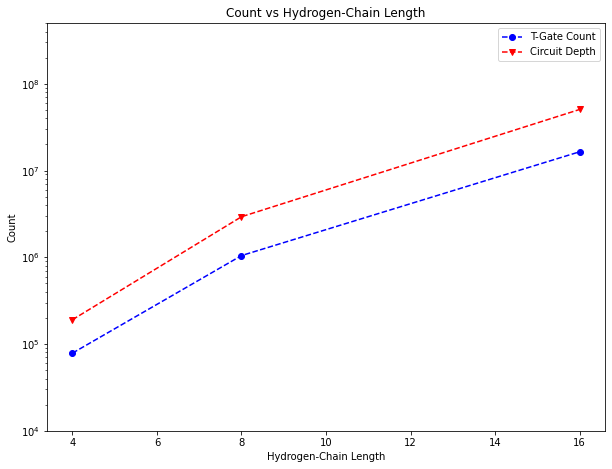

In [21]:
### 
### Plot circuit depth and T-Gate count as a function of 
### the size of the Hydrogen Chain
### 
plt.figure(figsize=(10,7.5))
plt.plot(
    df_h_chain['Num_Qubits']-1, df_h_chain['CliffT_T_Gate_Count'], 
    'b--o', label='T-Gate Count')
plt.plot(
    df_h_chain['Num_Qubits']-1, df_h_chain['CliffT_Depth'],
    'r--v', label='Circuit Depth' 
)
plt.legend()
plt.title('Count vs Hydrogen-Chain Length')
plt.xlabel('Hydrogen-Chain Length')
plt.ylabel('Count')
plt.yscale('log')
plt.ylim([10**4, 5*10**8])